In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random

## <font color='red'>函数定义</font>

In [2]:
# 多项式特征空间拓展 X (28 * N) | label_mat (1 * N)
def PolynomialFeatures(df, MaxDegree):
    # 取第一列、第二列特征的值
    x1 = df.iloc[:,:1].values
    x2 = df.iloc[:,1:2].values
    length_sample = len(x1)
    FeatureArray = np.ones([1,length_sample])
    for powerNum in range(1, MaxDegree + 1):
        for power_index in range(powerNum + 1):
            new_feat = (np.power(x1,power_index) * np.power(x2,powerNum - power_index)).reshape([length_sample,1])
            FeatureArray = np.concatenate((FeatureArray,new_feat.T), axis = 0)
    
    X = np.mat(FeatureArray,dtype=float)
    return X
# SigMod function
# X    : 28 * 300
# Theta: 1 * 28
def SigMod(X, Theta):
    Z = Theta * X
    return 1 / (1+np.exp(-Z)) # 1 * 300

# 预测函数Sigmod的取值(返回0或1数组)
# X    : 28 * 300
# Theta: 1 * 28
def Predict(Theta, X):
    h = SigMod(X, Theta) # h(Z) = h( Theta * X ) = 1 * 300
    # 判决预测值是 1 或 0
    #predict = 1 if h>=0.5 else 0
    predict_label = np.where(h.T >=0.5 , 1 , 0)
    return predict_label

def Plot_X_Mat(df, MaxDegree):
    x1_Min = df['microchip_test_1'].min()
    x1_Max = df['microchip_test_1'].max()
    x2_Min = df['microchip_test_2'].min()
    x2_Max = df['microchip_test_2'].max()
    # 50*50 50*50
    plot_x1, plot_x2 = np.meshgrid(np.linspace(x1_Min, x1_Max), np.linspace(x2_Min, x2_Max))
    x_1 = plot_x1.ravel()   # (2500,)
    x_2 = plot_x2.ravel()   # (2500,)
    n = len(x_1)            #  2500
    x_1 = x_1.reshape(n,1)  # (2500,1)
    x_2 = x_2.reshape(n,1)  # (2500,1)
    plt_array = np.ones([1,n])
    for powerNum in range(1, MaxDegree+1):
        for power_index in range(powerNum+1):
            plt_new_feat = np.power(x_1,power_index) * np.power(x_2,powerNum-power_index)
            plt_array = np.concatenate((plt_array,plt_new_feat.T), axis = 0)
    # 28*2500
    plt_x_mat = np.matrix(plt_array) 
    return plt_x_mat, plot_x1, plot_x2

def Draw_data_boundary(df, plot_x_mat, plot_x1, plot_x2, theta_last, ):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    # 描绘数据散点
    ax.scatter(df[df['label']==1]['microchip_test_1'], df[df['label']==1]['microchip_test_2'],\
               marker='+', color='k', label='y=1 Accpeted')
    ax.scatter(df[df['label']==0]['microchip_test_1'], df[df['label']==0]['microchip_test_2'], \
               marker='o', color='y', edgecolors='k', label='y=0 Rejected')
    ax.set(xlabel='Microchip Test 1', ylabel='Microchip Test 2',title='data-label')
    # 描绘非线性决策边界
    h_cal = SigMod(plot_x_mat, theta_last) # 1 * 2500
    h_cal = h_cal.reshape(plot_x1.shape)   # 2500 * 1
    # 等高线绘制
    ax.contour(plot_x1, plot_x2, h_cal, [0.5], colors='r')
    plt.legend()
    plt.show()
    return

## <font color='red'>参数定义+源文件的数据随即均等分块</font>

In [3]:
MaxDegree = 6
# (1,28)
Theta = np.mat([[ 1.27256235,1.18099236, 0.62519715,-1.43104291,-0.91708144,-2.01962584,-0.17498602,-0.35744867,-0.36560343,0.12407648,-1.1928424,-0.27462725,-0.61563785,-0.05125803,-1.45822984,-0.45657397,-0.2954049,-0.27774594
,-0.04498569,-0.20611467,-0.24211245,-0.92502243,-0.143843,-0.32740456,0.01540987,-0.29251453,0.0275734,-1.04331483]])
FilePath  = r'ex2data2.txt'
DF = pd.read_csv(FilePath, sep=',', header=None)
# 给每一列数据标签命名
DF.rename(columns={0:'microchip_test_1', 1:'microchip_test_2', 2:'label'}, inplace=True)
# 初始化空表
df1 = pd.DataFrame(columns=('microchip_test_1','microchip_test_2','label'))
df2 = pd.DataFrame(columns=('microchip_test_1','microchip_test_2','label'))
df3 = pd.DataFrame(columns=('microchip_test_1','microchip_test_2','label'))
numlist = [1,2,3] * 39
numlist.append(1)
random.shuffle(numlist)

In [4]:
index = 0
while index < 118:
    if numlist[index] == 1:
        df1 = df1.append([{'microchip_test_1':DF.iloc[index,0],'microchip_test_2':DF.iloc[index,1],'label':DF.iloc[index,2]}],ignore_index=True)
    elif numlist[index] == 2:
        df2 = df2.append([{'microchip_test_1':DF.iloc[index,0],'microchip_test_2':DF.iloc[index,1],'label':DF.iloc[index,2]}],ignore_index=True)
    elif numlist[index] == 3:
        df3 = df3.append([{'microchip_test_1':DF.iloc[index,0],'microchip_test_2':DF.iloc[index,1],'label':DF.iloc[index,2]}],ignore_index=True)
    index += 1

## <font color='red'>上面步骤分块后，分别导入数据文件</font>

In [5]:
df1.to_csv('A.csv',mode='w',index = False)
df2.to_csv('B.csv',mode='w',index = False)
df3.to_csv('C.csv',mode='w',index = False)

## <font color='red'>分别绘制原始数据和边界看看啥样子</font>

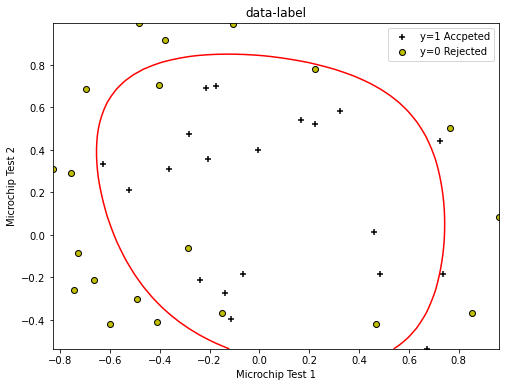

In [6]:
plot_x_mat, x1, x2 = Plot_X_Mat(df1, MaxDegree)
Draw_data_boundary(df1, plot_x_mat, x1, x2, Theta)

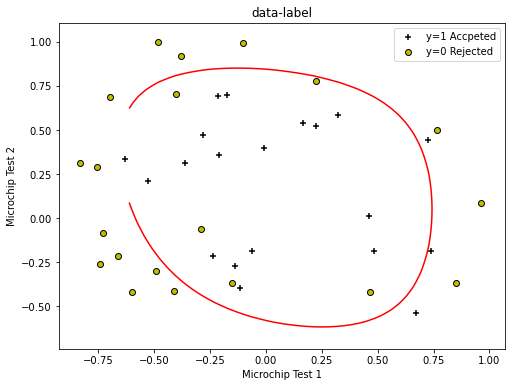

In [7]:
plot_x_mat, x1, x2 = Plot_X_Mat(df2, MaxDegree)
Draw_data_boundary(df1, plot_x_mat, x1, x2, Theta)

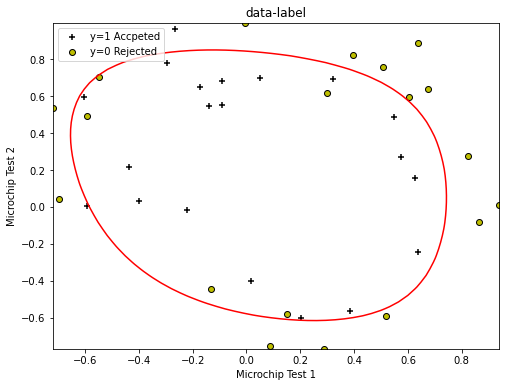

In [8]:
plot_x_mat, x1, x2 = Plot_X_Mat(df3, MaxDegree)
Draw_data_boundary(df3, plot_x_mat, x1, x2, Theta)

## <font color='red'>继续扩展数据</font>

In [9]:
# DF总表、df1、df2、df3 全部置空！！！
DF = pd.DataFrame(columns=('microchip_test_1','microchip_test_2','label'))
df1 = pd.DataFrame(columns=('microchip_test_1','microchip_test_2','label'))
df2 = pd.DataFrame(columns=('microchip_test_1','microchip_test_2','label'))
df3 = pd.DataFrame(columns=('microchip_test_1','microchip_test_2','label'))
numlist = [1,2,3] * 100
random.shuffle(numlist)

count = 0
while count < 300:
    x = float('%.5f'%random.uniform(-0.82,1.05))
    y = float('%.5f'%random.uniform(-0.77,1.05))
    #DF = DF.append([{'microchip_test_1':x,'microchip_test_2':y,'label':None}],  ignore_index=True)
    DF.loc[count,:] = [x,y,None]
    count += 1
#print(DF)  # shape : (300,3)
XX = PolynomialFeatures(DF,MaxDegree) # shape : 28*300
YY = Predict(Theta,XX)        # shape : 300*1
DF['label'] = YY

In [ ]:
index = 0
while index < 300:
    if numlist[index] == 1:
        df1 = df1.append([{'microchip_test_1':DF.iloc[index,0],'microchip_test_2':DF.iloc[index,1],'label':DF.iloc[index,2]}],ignore_index=True)
    elif numlist[index] == 2:
        df2 = df2.append([{'microchip_test_1':DF.iloc[index,0],'microchip_test_2':DF.iloc[index,1],'label':DF.iloc[index,2]}],ignore_index=True)
    elif numlist[index] == 3:
        df3 = df3.append([{'microchip_test_1':DF.iloc[index,0],'microchip_test_2':DF.iloc[index,1],'label':DF.iloc[index,2]}],ignore_index=True)
    index += 1

In [19]:
df1.to_csv('A.csv',mode='a',index = False)
df2.to_csv('B.csv',mode='a',index = False)
df3.to_csv('C.csv',mode='a',index = False)

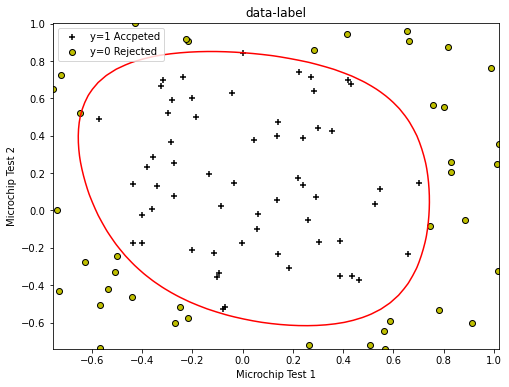

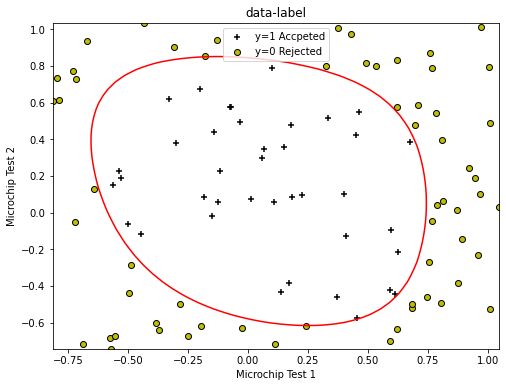

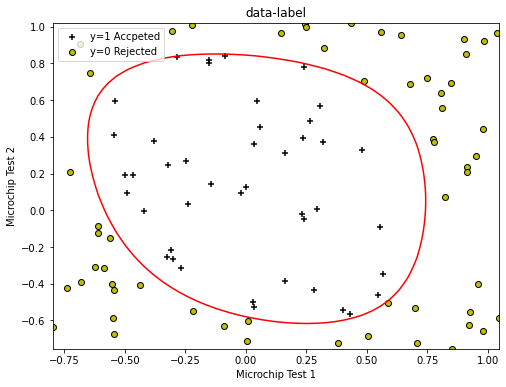

In [18]:
plot_x_mat, x1, x2 = Plot_X_Mat(df1, MaxDegree)
Draw_data_boundary(df1, plot_x_mat, x1, x2, Theta)
plot_x_mat, x1, x2 = Plot_X_Mat(df2, MaxDegree)
Draw_data_boundary(df2, plot_x_mat, x1, x2, Theta)
plot_x_mat, x1, x2 = Plot_X_Mat(df3, MaxDegree)
Draw_data_boundary(df3, plot_x_mat, x1, x2, Theta)